In [2]:
import pandas as pd
import seaborn as sns
ds = pd.read_csv('Assignment 4v2.csv', sep=',')
ds.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
ds['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [11]:
ResidenceTypeGenderTable = ds.groupby(['gender','Residence_type']).size().unstack('gender', fill_value=0)
ResidenceTypeGenderTable

gender,Female,Male
Residence_type,,
Rural,1465,1048
Urban,1529,1067


<AxesSubplot:xlabel='Residence_type'>

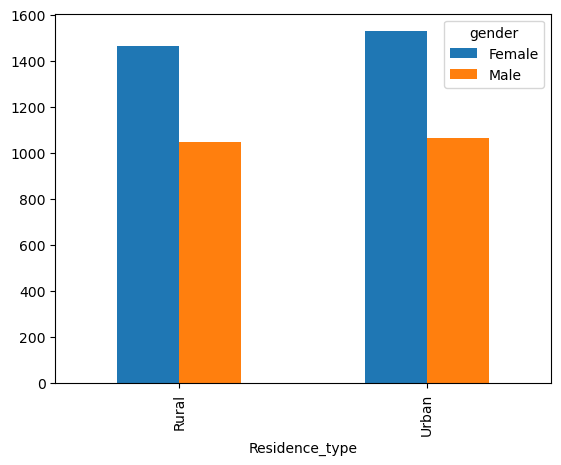

In [12]:
SmokingStatusGenderTable.plot(kind='bar')

In [13]:
from scipy.stats import chi2_contingency
chi2_contingency(SmokingStatusGenderTable)

(0.16641574389228111,
 0.6833170950912254,
 1,
 array([[1472.67997651, 1040.32002349],
        [1521.32002349, 1074.67997651]]))

In [27]:
WorkTypeGenderTable = ds.groupby(['smoking_status','gender']).size().unstack('smoking_status', fill_value=0)
WorkTypeGenderTable

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,836,477,1229,452
Male,708,407,663,337


<AxesSubplot:xlabel='gender'>

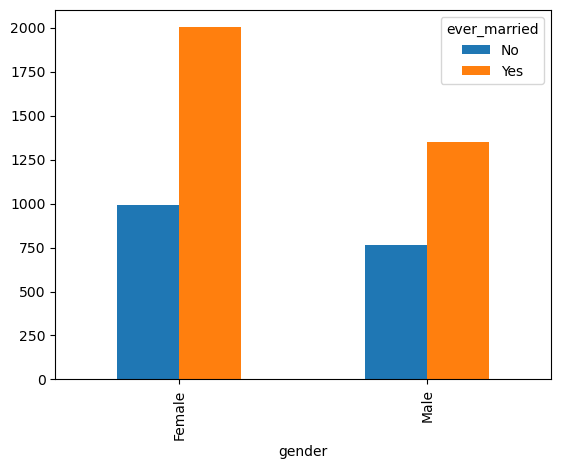

In [24]:
WorkTypeGenderTable.plot(kind = 'bar')

In [28]:
chi2_contingency(WorkTypeGenderTable)

(52.56199167147405,
 2.2731242721573073e-11,
 3,
 array([[ 904.82207868,  518.04580153, 1108.75866119,  462.3734586 ],
        [ 639.17792132,  365.95419847,  783.24133881,  326.6265414 ]]))